In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class DNA_Organism:
    
    def __init__(self, sequence = None, size = 1000, mutation_odds = .001):
        self.size = 1000
        if sequence is None:
            self.sequence = self.get_sequence(n = self.size)
        else:
            self.sequence = sequence
        self.n_children = np.random.choice([1,2,3])
        self.mutation_odds = mutation_odds
        
    def choose_1_basepair(self):
        base_pairs = ['A','T','C','G']
        return(np.random.choice(base_pairs))
    
    def get_sequence(self, n):
        return np.array([self.choose_1_basepair() for _ in range(n)]) 
    
    def create_children(self):
        children = []
        for _ in range(self.n_children):
            mutate = np.random.choice([1,0],replace = True, p = [self.mutation_odds,1-self.mutation_odds ], size = self.size)
            child = self.sequence.copy()
            child[mutate == 1] = self.get_sequence(sum(mutate))
            children.append(DNA_Organism(sequence = child))
            
        return children

In [3]:
parents = [DNA_Organism() for _ in range(3)]

In [4]:
def run_sim(parents, generations = 100, children_max = 500):
    cur_generation = parents.copy()
    
    for epoch in range(generations):
        children = [organism.create_children() for organism in cur_generation]
        next_generation = []
        for child in children:
            next_generation.extend(child)
        if len(cur_generation) > children_max:
            np.random.shuffle(next_generation)
            cur_generation = next_generation[:children_max]
        else:
            cur_generation = next_generation
        
    return(cur_generation)

In [5]:
def distance(sequence1, sequence2):
    return sum(a != b for a,b in zip(sequence1, sequence2))

In [6]:
def all_distances(organisms):
    n = len(organisms)
    distances = np.zeros((n,n))
    for row in range(n):
        for col in range(n):
            if row > col:
                distances[row,col] = distance(organisms[row].sequence, organisms[col].sequence)
                
    distances = distances + distances.T
    
    return(distances)

In [7]:
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

In [8]:
final_children = run_sim(parents)
all_distances = all_distances(final_children)
distances_long = squareform(all_distances)

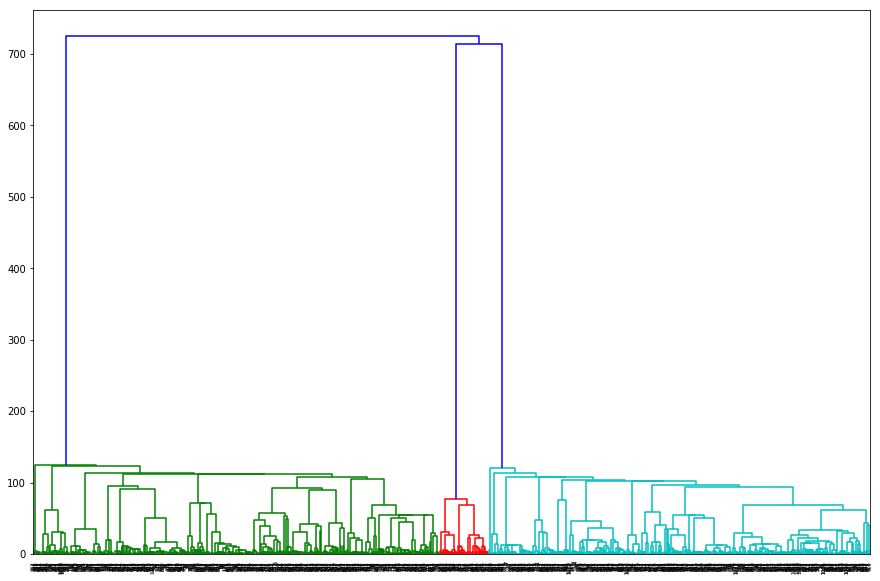

In [11]:
links = linkage(distances_long, metric = 'ward')
fig, axes = plt.subplots(figsize = (15,10))
dendrogram(links)
plt.show() # 3 ancestors!